# Import the Fashion MNIST dataset

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [2]:
# load fashion minist data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## relation between labels and classes

|  **Label** | **Class** |
| :--- | :--- |
|  0 | T-shirt/top |
|  1 | Trouser |
|  2 | Pullover |
|  3 | Dress |
|  4 | Coat |
|  5 | Sandal |
|  6 | Shirt |
|  7 | Sneaker |
|  8 | Bag |
|  9 | Ankle boot |

In [3]:
# set relation labels and classes as array
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#  Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

# Preprocess the data

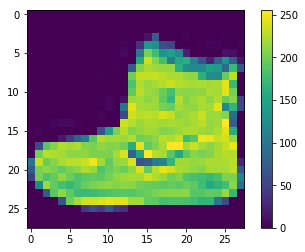

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

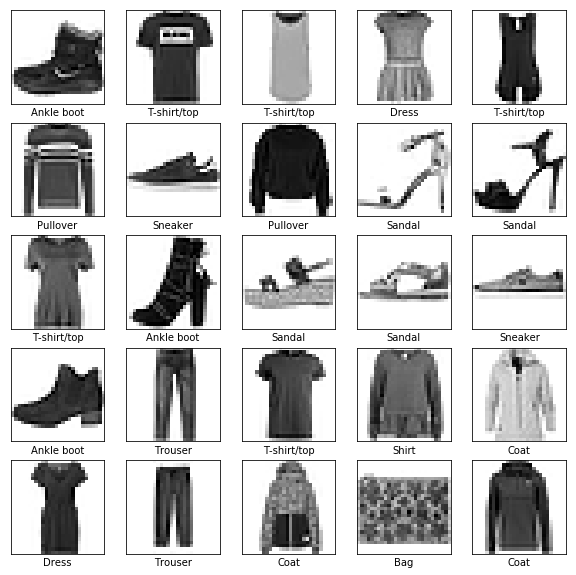

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Build the model

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.4942 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.3724 - acc: 0.8649
Epoch 3/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.3347 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3133 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.2944 - acc: 0.8916


# Evaluate accuracy

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.8745


# Make predictions

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([1.3765900e-05, 3.4049069e-07, 6.6303851e-06, 2.2758109e-06,
       1.0838107e-05, 2.6703719e-02, 7.8036894e-05, 9.3516648e-02,
       2.9318128e-04, 8.7937456e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
class_names[9]

'Ankle boot'

In [23]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

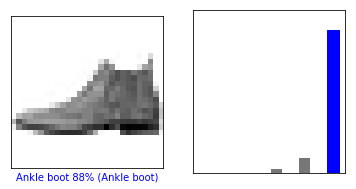

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

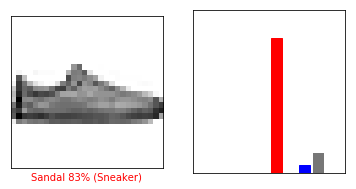

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

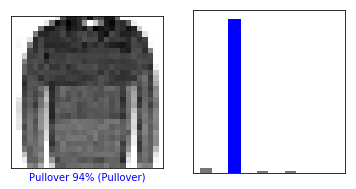

In [27]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

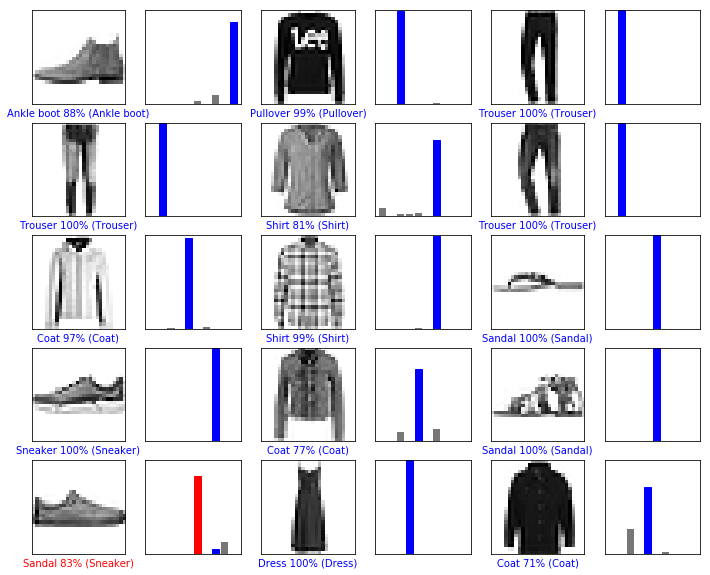

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.3765887e-05 3.4048972e-07 6.6303978e-06 2.2758109e-06 1.0838117e-05
  2.6703719e-02 7.8036828e-05 9.3516648e-02 2.9318102e-04 8.7937456e-01]]


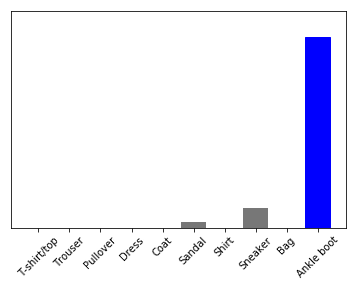

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

9